In [25]:
%load_ext autoreload
%autoreload 2

import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
combine_2012 = pd.read_csv('../../data/achou-nba-draft-combine-measurements/2012_nba_draft_combine.csv')
combine_2012.head()

,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,Andre Drummond,2012,9.0,81.75,83.75,90.25,109.5,33.5,143.0,31.5,141.0,279.0,7.5,9.50,9.50,10.0,10.83,3.39
1,1,Andrew Nicholson,2012,19.0,80.50,81.50,88.00,107.0,30.5,137.5,28.5,135.5,234.0,7.6,10.00,10.75,10.0,11.89,3.67
2,2,Anthony Davis,2012,1.0,81.25,82.50,89.50,108.0,NaN,NaN,NaN,NaN,222.0,7.9,9.00,8.50,NaN,NaN,NaN
3,3,Arnett Moultrie,2012,27.0,81.50,82.75,86.25,106.5,37.5,144.0,33.5,140.0,233.0,7.7,9.25,9.25,10.0,11.32,3.22
4,4,Austin Rivers,2012,10.0,75.50,77.00,79.25,96.5,37.5,134.0,32.5,129.0,203.0,6.2,8.50,10.00,1.0,11.54,3.32


In [15]:
raptor_df = pd.read_csv('../../data/nba-player-advanced-metrics/nba-data-historical.csv', encoding='latin-1')

In [96]:
raptor_df.head()

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
0,youngtr01,Trae Young,2020,21,PG,ATL,-7.6,ATL,60,2120,65.1,35.3,29.3,59.5,9.2,4.2,1.2,4.8,7.1,-3.5,3.6,7.0,17.0,15.4,34.9,45.6,16.2,1.6,11.5,6.5,1.4,0.3,113.6,36.1,117.2,50.1,36.1,86.0,45.5,44.8
1,huntede01,De'Andre Hunter,2020,22,SF,ATL,-7.6,ATL,63,2018,62.0,32.0,13.5,52.1,1.9,5.0,1.1,1.8,-2.5,-1.3,-3.8,-1.1,5.9,4.7,17.5,8.0,12.1,2.3,13.1,7.6,1.0,0.7,99.5,16.9,117.3,45.4,35.5,76.4,44.5,21.1
2,huertke01,Kevin Huerter,2020,21,SG,ATL,-7.6,ATL,56,1760,54.1,31.4,13.6,53.6,4.2,4.5,1.5,1.7,-0.4,-2.4,-2.8,-0.1,8.0,8.1,17.1,17.5,12.0,2.1,12.0,7.0,1.4,1.3,107.1,17.2,116.5,45.3,38.0,82.8,54.8,10.5
3,reddica01,Cam Reddish,2020,20,SF,ATL,-7.6,ATL,58,1551,47.6,26.7,13.7,50.0,2.0,4.9,2.0,2.2,-2.8,-0.1,-3.0,-0.2,5.9,5.0,18.9,8.0,13.6,2.4,12.7,7.5,1.9,1.5,94.7,18.3,115.0,42.8,33.2,80.2,45.1,22.7
4,collijo01,John Collins,2020,22,PF,ATL,-7.6,ATL,41,1363,41.9,33.2,22.7,65.9,1.5,10.7,2.5,1.9,-0.0,-0.3,-0.3,1.7,15.6,17.1,22.7,7.6,10.1,9.0,24.0,16.4,1.1,4.1,123.7,21.6,112.2,64.2,40.1,80.0,24.3,24.8


In [17]:
raptor_df.describe()

,year_id,age,tmRtg,G,Min,MP%,MPG,P/36,TS%,A/36,...,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
count,20059.000000,20059.000000,20059.000000,20059.000000,20059.000000,20059.000000,20059.000000,20054.000000,19964.000000,20054.000000,...,20059.000000,20059.000000,20040.000000,20045.000000,20059.000000,19894.000000,15717.000000,19182.000000,19952.000000,19952.000000
mean,2000.776709,26.689965,-0.214737,49.132260,1162.430580,29.912473,20.128655,14.231889,50.651393,3.222759,...,1.639528,1.462630,101.506068,18.936089,106.718271,46.103680,25.522193,72.452737,16.886723,31.501804
std,12.399459,4.004577,4.813838,27.035407,926.716566,23.641611,10.243939,5.344080,9.912388,2.331626,...,1.060071,1.819356,18.126685,5.320733,5.174677,10.468007,17.603023,14.582095,20.021468,23.280050
min,1977.000000,18.000000,-15.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,24.000000,-3.600000,25.000000,304.000000,7.800000,11.600000,11.000000,47.500000,1.600000,...,1.100000,0.400000,96.000000,15.600000,103.700000,42.600000,12.500000,66.500000,0.400000,19.400000
50%,2002.000000,26.000000,-0.100000,54.000000,991.000000,25.700000,19.500000,14.000000,51.900000,2.600000,...,1.500000,0.900000,103.800000,18.600000,107.000000,47.000000,30.000000,75.000000,6.700000,28.200000
75%,2012.000000,29.000000,3.400000,75.000000,1901.000000,49.400000,28.700000,17.300000,55.500000,4.300000,...,2.100000,2.000000,110.300000,21.900000,110.000000,50.700000,36.600000,81.500000,30.825000,38.900000
max,2020.000000,44.000000,13.400000,82.000000,3638.000000,92.000000,44.500000,119.800000,150.000000,36.600000,...,24.900000,77.800000,300.000000,187.800000,125.000000,100.000000,100.000000,100.000000,100.000000,600.000000


In [18]:
raptor_df['year_id'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988,
       1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977])

In [63]:
import sqlite3
from sqlite3 import Error


def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()


if __name__ == '__main__':
    create_connection(r"AI_SCOUT.db")

2.6.0


In [20]:
# Get the number of rows and columns (20059 rows, 40 columns)
raptor_df.shape

(20059, 40)

In [21]:
# Find the avg value for each numeric column
raptor_df.mean()

year_id       2000.776709
age             26.689965
tmRtg           -0.214737
G               49.132260
Min           1162.430580
MP%             29.912473
MPG             20.128655
P/36            14.231889
TS%             50.651393
A/36             3.222759
R/36             6.684277
SB/36            2.011678
TO/36            2.399023
Raptor O        -1.457959
Raptor D        -0.423416
Raptor+/-       -1.881824
Raptor WAR       1.629209
PIE%             7.920669
AWS%             7.469118
USG%            18.919926
AST%            13.095409
TOV%            14.839019
ORB%             6.086041
DRB%            13.870178
TRB%             9.975413
STL%             1.639528
BLK%             1.462630
ORtg           101.506068
%Pos            18.936089
DRtg           106.718271
2P%             46.103680
3P%             25.522193
FT%             72.452737
3PAr            16.886723
FTAr            31.501804
dtype: float64

In [24]:
# Get the mean / avg of a specific column
raptor_df.loc[:,'Min'].mean()

1162.4305797896207

In [27]:
raptor_df.columns

Index(['player_id', 'name_common', 'year_id', 'age', 'pos', 'team_id', 'tmRtg',
       'franch_id', 'G', 'Min', 'MP%', 'MPG', 'P/36', 'TS%', 'A/36', 'R/36',
       'SB/36', 'TO/36', 'Raptor O', 'Raptor D', 'Raptor+/-', 'Raptor WAR',
       'PIE%', 'AWS%', 'USG%', 'AST%', 'TOV%', 'ORB%', 'DRB%', 'TRB%', 'STL%',
       'BLK%', 'ORtg', '%Pos', 'DRtg', '2P%', '3P%', 'FT%', '3PAr', 'FTAr'],
      dtype='object')

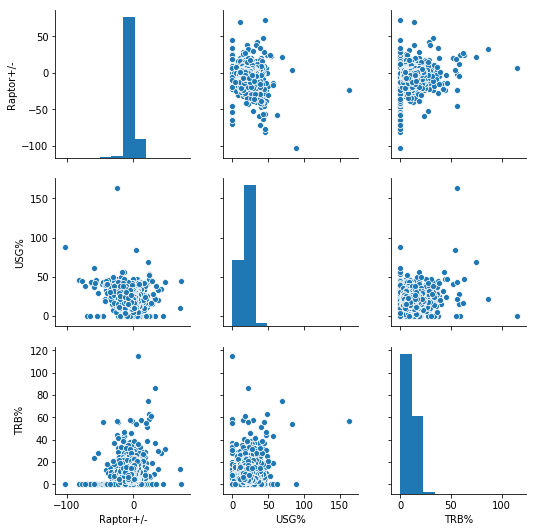

In [41]:
# Make a pairwise scatter plot
sns.pairplot(raptor_df[['Raptor+/-','USG%','TRB%']])

In [49]:
raptor_df.dtypes

player_id       object
name_common     object
year_id          int64
age              int64
pos             object
team_id         object
tmRtg          float64
franch_id       object
G                int64
Min              int64
MP%            float64
MPG            float64
P/36           float64
TS%            float64
A/36           float64
R/36           float64
SB/36          float64
TO/36          float64
Raptor O       float64
Raptor D       float64
Raptor+/-      float64
Raptor WAR     float64
PIE%           float64
AWS%           float64
USG%           float64
AST%           float64
TOV%           float64
ORB%           float64
DRB%           float64
TRB%           float64
STL%           float64
BLK%           float64
ORtg           float64
%Pos           float64
DRtg           float64
2P%            float64
3P%            float64
FT%            float64
3PAr           float64
FTAr           float64
dtype: object

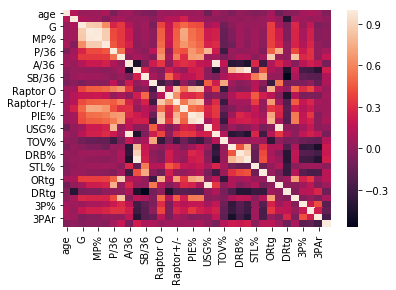

In [44]:
# Make Heat map
correlation = raptor_df[['age', 'pos', 'team_id', 'tmRtg',
       'franch_id', 'G', 'Min', 'MP%', 'MPG', 'P/36', 'TS%', 'A/36', 'R/36',
       'SB/36', 'TO/36', 'Raptor O', 'Raptor D', 'Raptor+/-', 'Raptor WAR',
       'PIE%', 'AWS%', 'USG%', 'AST%', 'TOV%', 'ORB%', 'DRB%', 'TRB%', 'STL%',
       'BLK%', 'ORtg', '%Pos', 'DRtg', '2P%', '3P%', 'FT%', '3PAr', 'FTAr']].corr()
sns.heatmap(correlation)

In [46]:
pd.set_option('display.max_columns', 500)
correlation

,age,tmRtg,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
age,1.000000,0.136079,0.019586,0.039977,0.042022,0.092947,-0.073490,0.033480,0.051160,-0.019621,-0.064377,-0.085304,0.049515,0.027059,0.052723,0.054334,0.035839,0.038547,-0.129457,0.042879,-0.005296,-0.070226,0.012237,-0.023939,-0.051816,-0.039599,0.070551,-0.129642,-0.047573,-0.013605,0.066449,0.098732,0.060913,-0.052488
tmRtg,0.136079,1.000000,0.098956,0.059111,0.059806,-0.048170,0.052943,0.084114,0.022432,0.021641,0.030049,-0.012171,0.070776,0.136977,0.127018,0.250509,0.062822,0.065551,0.015160,-0.005337,-0.022340,0.015199,0.001698,0.022238,0.005461,0.029925,0.092060,0.007335,-0.409603,0.078791,0.044003,0.019280,0.044812,-0.001593
G,0.019586,0.098956,1.000000,0.865842,0.855330,0.626574,0.269209,0.347946,0.125033,0.015146,0.057651,-0.084666,0.390905,0.196498,0.407072,0.502561,0.424988,0.407610,0.062843,0.141597,-0.120954,-0.024227,0.047661,0.021812,0.032455,0.028463,0.368143,0.063692,-0.074535,0.281105,0.031797,0.195095,-0.067673,-0.036629
Min,0.039977,0.059111,0.865842,1.000000,0.992894,0.871271,0.404585,0.344606,0.207762,0.001533,0.044597,-0.027689,0.468792,0.201772,0.470298,0.725933,0.525021,0.465906,0.219253,0.245143,-0.150777,-0.063678,0.053741,0.006186,0.052585,-0.003287,0.362598,0.221061,-0.062519,0.267241,0.077185,0.243078,-0.041384,-0.017272
MP%,0.042022,0.059806,0.855330,0.992894,1.000000,0.877274,0.407136,0.346291,0.208411,0.002786,0.045927,-0.029001,0.472851,0.203543,0.474388,0.723145,0.529692,0.470155,0.221030,0.247591,-0.153477,-0.065982,0.055430,0.006217,0.054006,-0.001107,0.364226,0.222830,-0.069411,0.268257,0.081798,0.243972,-0.032227,-0.018594
MPG,0.092947,-0.048170,0.626574,0.871271,0.877274,1.000000,0.444644,0.351355,0.249162,-0.024686,0.023725,-0.025602,0.504427,0.184255,0.488795,0.661577,0.570275,0.494316,0.258398,0.298856,-0.162719,-0.114260,0.049678,-0.023026,0.055989,-0.023334,0.370848,0.260176,-0.010311,0.260766,0.120016,0.273119,0.009114,-0.034790
P/36,-0.073490,0.052943,0.269209,0.404585,0.407136,0.444644,1.000000,0.539734,0.114117,0.016250,-0.018756,0.156902,0.584481,0.017598,0.463494,0.419052,0.668177,0.560260,0.791382,0.211769,-0.308526,0.028702,0.006367,0.018436,0.047836,-0.058791,0.482667,0.755559,0.004542,0.400858,0.205516,0.322593,0.012927,0.074273
TS%,0.033480,0.084114,0.347946,0.344606,0.346291,0.351355,0.539734,1.000000,0.017585,0.080485,0.028222,-0.059692,0.664064,0.090885,0.572642,0.305488,0.686610,0.701887,0.031692,0.059326,-0.091030,0.024200,0.109611,0.086917,-0.016373,0.060760,0.869817,0.032242,-0.009238,0.822231,0.288463,0.313814,0.018690,0.188726
A/36,0.051160,0.022432,0.125033,0.207762,0.208411,0.249162,0.114117,0.017585,1.000000,-0.443086,-0.074025,0.215808,0.342348,-0.011083,0.260324,0.314590,0.281641,0.180096,0.164038,0.984133,0.173016,-0.397846,-0.362754,-0.442580,0.278705,-0.315918,0.121341,0.268248,0.115469,-0.041326,0.153329,0.238054,0.171358,-0.095242
R/36,-0.019621,0.021641,0.015146,0.001533,0.002786,-0.024686,0.016250,0.080485,-0.443086,1.000000,0.243066,0.005972,-0.050754,0.223222,0.077789,0.013347,0.217167,0.245456,-0.015500,-0.427503,0.020679,0.787259,0.894575,0.997189,-0.170817,0.435230,0.099862,0.025452,-0.445382,0.156490,-0.287028,-0.310899,-0.400968,0.232079


ValueError: max must be larger than min in range parameter.

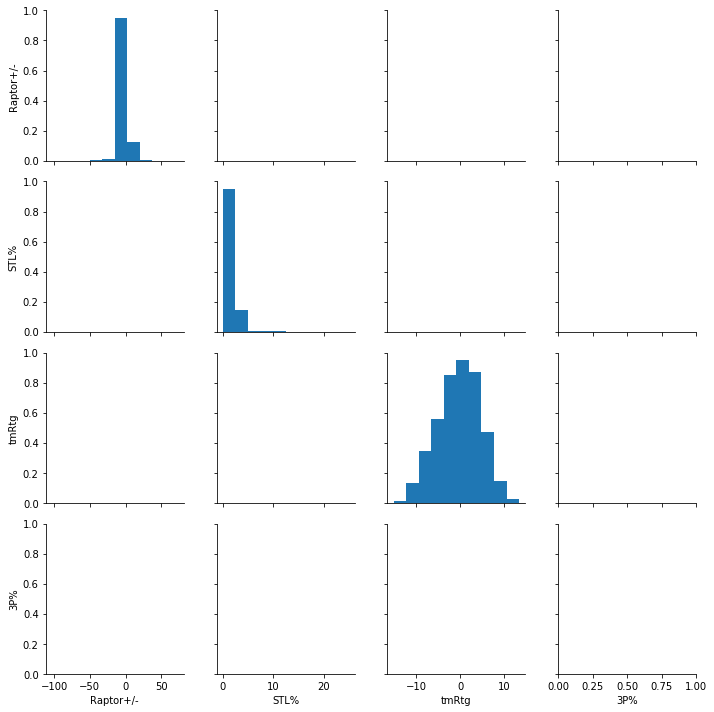

In [58]:
# PIE%, AWS%, tmRtg, USG%, AST%, STL%
# 'PIE%', 'AWS%', 'tmRtg', 'USG%', 'AST%', 'STL%']])
sns.pairplot(raptor_df[['Raptor+/-', 'STL%', 'tmRtg', '3P%']])

In [56]:
raptor_df['pos'].unique()

array(['PG', 'SF', 'SG', 'PF', 'C', 'G-F', 'F', 'G'], dtype=object)

In [60]:
# That 538 dataset has positions listed, and you could use, as a first model, 
# a classifier based on certain stats to predict a position.

In [64]:
conn = sqlite3.connect('AI_SCOUT.db')

In [65]:
c = conn.cursor()

In [66]:
raptor_df.to_sql('RAPTOR', conn, if_exists='replace', index=False)

/opt/anaconda3/envs/ai-scout/lib/python3.6/site-packages/pandas/core/generic.py:2712: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


df.to_sql('CARS', conn, if_exists='replace', index = False)
>>> import sqlite3
>>> conn = sqlite3.connect('d:/temp/test.sqlite')
>>> df.to_sql('new_table_name', conn, if_exists='replace', index=False)
>>> pd.read_sql('select * from new_table_name', conn)

In [67]:
pd.read_sql('SELECT * FROM RAPTOR', conn)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
0,youngtr01,Trae Young,2020,21,PG,ATL,-7.6,ATL,60,2120,65.1,35.3,29.3,59.5,9.2,4.2,1.2,4.8,7.1,-3.5,3.6,7.0,17.0,15.4,34.9,45.6,16.2,1.6,11.5,6.5,1.4,0.3,113.6,36.1,117.2,50.1,36.1,86.0,45.5,44.8
1,huntede01,De'Andre Hunter,2020,22,SF,ATL,-7.6,ATL,63,2018,62.0,32.0,13.5,52.1,1.9,5.0,1.1,1.8,-2.5,-1.3,-3.8,-1.1,5.9,4.7,17.5,8.0,12.1,2.3,13.1,7.6,1.0,0.7,99.5,16.9,117.3,45.4,35.5,76.4,44.5,21.1
2,huertke01,Kevin Huerter,2020,21,SG,ATL,-7.6,ATL,56,1760,54.1,31.4,13.6,53.6,4.2,4.5,1.5,1.7,-0.4,-2.4,-2.8,-0.1,8.0,8.1,17.1,17.5,12.0,2.1,12.0,7.0,1.4,1.3,107.1,17.2,116.5,45.3,38.0,82.8,54.8,10.5
3,reddica01,Cam Reddish,2020,20,SF,ATL,-7.6,ATL,58,1551,47.6,26.7,13.7,50.0,2.0,4.9,2.0,2.2,-2.8,-0.1,-3.0,-0.2,5.9,5.0,18.9,8.0,13.6,2.4,12.7,7.5,1.9,1.5,94.7,18.3,115.0,42.8,33.2,80.2,45.1,22.7
4,collijo01,John Collins,2020,22,PF,ATL,-7.6,ATL,41,1363,41.9,33.2,22.7,65.9,1.5,10.7,2.5,1.9,0.0,-0.3,-0.3,1.7,15.6,17.1,22.7,7.6,10.1,9.0,24.0,16.4,1.1,4.1,123.7,21.6,112.2,64.2,40.1,80.0,24.3,24.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20054,weissbo01,Bob Weiss,1977,34,PG,WSB,1.0,WAS,62,768,19.5,12.4,6.8,51.2,5.8,3.1,2.7,2.3,-0.3,1.4,1.1,1.5,8.2,10.5,10.1,20.9,25.5,2.1,7.1,4.6,3.1,0.5,99.5,11.5,97.9,46.6,NaN,78.4,0.0,27.8
20055,riordmi01,Mike Riordan,1977,31,SF,WSB,1.0,WAS,49,289,7.3,5.9,9.3,39.3,2.4,3.2,0.6,2.1,-4.7,-2.5,-7.3,-0.7,1.2,-4.3,16.0,9.0,15.2,2.5,7.0,4.8,0.5,0.4,81.1,15.4,103.3,36.2,NaN,73.3,0.0,16.0
20056,weathni01,Nick Weatherspoon,1977,26,SF,WSB,1.0,WAS,11,152,3.9,13.8,13.2,37.1,0.4,5.4,1.8,2.2,-5.6,-1.8,-7.3,-0.4,0.8,-4.4,22.9,1.8,11.2,7.6,8.6,8.1,0.9,1.7,78.3,21.1,100.9,35.5,NaN,62.5,0.0,10.5
20057,pacejo01,Joe Pace,1977,23,C,WSB,1.0,WAS,30,119,3.0,4.0,18.3,47.2,1.1,9.7,5.4,4.6,-4.1,1.5,-2.7,0.0,4.0,3.3,27.4,4.9,19.1,14.1,15.2,14.7,0.8,7.3,88.2,27.3,94.3,43.6,NaN,55.2,0.0,52.7


In [99]:
pd.read_sql(
    """
    SELECT * FROM RAPTOR
    WHERE name_common = 'Jimmy Butler'
    """, conn)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
0,butleji01,Jimmy Butler,2020,30,SF,MIA,3.2,MIA,54,1851,58.5,34.3,21.7,58.3,6.6,7.1,2.4,2.3,4.2,1.8,6.0,8.2,15.8,16.5,25.2,28.1,11.2,6.2,15.2,10.9,2.4,1.6,122.6,26.4,107.9,49.4,24.8,83.3,16.2,67.9
1,butleji01,Jimmy Butler,2019,29,SG,MIN,-1.5,MIN,10,361,9.1,36.1,21.2,57.9,4.3,5.2,3.4,1.4,2.4,0.7,3.1,1.1,13.6,16.0,23.0,18.2,7.1,4.7,10.8,7.7,3.2,2.4,121.5,22.7,110.5,50.9,37.8,78.7,28.7,38.9
2,butleji01,Jimmy Butler,2019,29,SF,PHI,2.6,PHI,55,1824,46.0,33.2,19.5,56.9,4.3,5.6,2.5,1.6,3.2,1.9,5.1,7.2,12.7,14.3,22.1,18.0,8.4,6.3,10.4,8.4,2.6,1.2,120.4,22.0,109.3,49.1,33.8,86.8,19.8,40.7
3,butleji01,Jimmy Butler,2018,28,SG,MIN,2.3,MIN,59,2164,54.6,36.7,22.7,59.0,5.0,5.4,2.4,1.9,5.5,2.3,7.8,11.5,14.8,16.0,24.9,20.6,8.9,4.2,12.7,8.4,2.7,1.0,122.1,24.8,110.2,50.9,35.0,85.4,21.7,46.1
4,butleji01,Jimmy Butler,2017,27,SF,CHI,0.4,CHI,76,2809,71.0,37.0,24.4,58.6,5.6,6.3,2.4,2.1,4.8,2.4,7.1,14.2,16.6,18.3,26.5,24.8,9.3,4.9,13.2,9.0,2.6,0.9,122.7,26.6,106.2,47.7,36.7,86.5,19.8,54.0
5,butleji01,Jimmy Butler,2016,26,SG,CHI,-1.5,CHI,67,2474,62.1,36.9,21.3,56.2,4.9,5.4,2.3,2.0,2.5,1.2,3.7,8.0,13.8,14.5,24.4,21.4,9.6,3.4,11.6,7.6,2.2,1.3,115.5,24.3,106.1,48.9,31.2,83.2,19.8,45.9
6,butleji01,Jimmy Butler,2015,25,SG,CHI,3.2,CHI,65,2513,63.2,38.7,20.1,58.3,3.3,5.9,2.3,1.4,3.2,-0.2,3.0,7.4,13.6,15.8,21.6,14.4,7.7,5.1,11.2,8.2,2.3,1.0,122.3,21.1,104.2,48.4,37.8,83.4,21.2,50.8
7,butleji01,Jimmy Butler,2014,24,SG,CHI,2.0,CHI,67,2591,65.0,38.7,13.5,52.2,2.7,5.1,2.5,1.6,0.5,3.4,3.9,8.7,9.6,11.6,16.8,11.1,10.8,3.9,10.5,7.2,2.6,1.1,107.5,16.5,100.4,45.7,28.3,76.9,34.6,48.8
8,butleji01,Jimmy Butler,2013,23,SF,CHI,0.4,CHI,82,2134,53.8,26.0,13.3,57.4,2.2,6.2,2.1,1.2,1.4,1.0,2.4,5.6,10.4,13.7,14.6,8.6,9.2,7.2,10.4,8.8,2.0,1.1,120.7,14.6,104.3,48.9,38.1,80.3,20.5,45.5
9,butleji01,Jimmy Butler,2012,22,SG,CHI,9.1,CHI,42,359,11.3,8.5,12.3,52.6,1.6,6.3,1.8,1.6,-0.4,0.4,0.0,0.5,7.6,8.9,14.9,5.7,11.9,7.3,10.1,8.7,1.6,1.0,111.8,15.0,100.4,44.1,18.2,76.8,13.9,70.9


In [88]:
ncaa_headers = pd.read_csv('../../data/ncaa_headers2.csv')
ncaa_headers.head()

,player_name,team,conf,GP,Min_per,ORtg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,role
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
colnames = ncaa_headers.columns

In [90]:
ncaa_df = pd.read_csv('../../data/trank_data.csv', header=None)
ncaa_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,Josh Warren,Cornell,Ivy,25,70.0,99.3,20.1,55.1,58.87,4.1,16.5,23.4,28.2,48,66,0.727,57,99,0.576,16,48,0.333,3.1,1.2,44.9,Sr,6-8,22.0,1.41569,99.9015,4.1,2020,27085,all,NaN,1.279412,47.0,72.0,10.0,27.0,0.6528,0.3704,6.0,6.0,1.00,NaN,108.4170,109.6390,1.72116,121.3010,-0.816042,-0.538024,-0.278018,-1.96083,28.0370,-1.028020,-0.932807,1.0000,3.7407,4.7407,3.2222,0.5926,0.7778,8.4444,Stretch 4
1,Andre Adams,Southern Utah,BSky,23,42.6,110.7,20.2,63.7,63.76,11.6,22.0,8.1,21.4,22,36,0.611,93,146,0.637,0,0,0.000,5.9,1.4,24.7,Jr,6-9,32.0,1.85365,109.4820,5.8,2020,32932,all,62.8,0.461520,68.0,94.0,25.0,52.0,0.7234,0.4808,4.0,4.0,1.00,NaN,91.8260,92.4422,2.67964,115.5690,3.128020,-0.106784,3.234800,2.58789,22.6087,0.595979,1.991920,2.1304,4.3478,6.4783,0.7826,0.5652,1.2174,9.0435,C
2,David Bell,Jacksonville,ASun,29,59.7,113.9,24.8,60.7,64.01,12.7,31.0,8.5,19.6,91,126,0.722,133,219,0.607,0,0,0.000,8.9,0.7,57.5,Sr,6-10,3.0,2.71744,117.0710,3.9,2020,33635,all,NaN,0.468733,80.0,119.0,29.0,66.0,0.6723,0.4394,24.0,25.0,0.96,NaN,89.5778,92.3455,2.99710,181.8500,4.218600,0.227392,3.991210,6.18646,24.8710,3.908550,2.277910,2.7419,7.2581,10.0000,0.9677,0.2581,1.9677,12.0323,C
3,Jake Toolson,BYU,WCC,31,83.3,114.6,22.6,58.4,60.73,1.8,15.1,20.7,15.3,59,74,0.797,82,176,0.466,82,175,0.469,1.2,1.8,21.1,Sr,6-5,5.0,4.23450,121.9450,1.7,2020,33955,all,49.0,1.923100,33.0,58.0,49.0,118.0,0.5690,0.4153,2.0,2.0,1.00,NaN,97.3340,93.6691,3.89534,200.1490,7.010140,4.943220,2.066920,7.65604,33.5938,5.608060,2.047980,0.4688,4.3750,4.8438,3.9062,1.0625,0.4062,15.1875,Combo G
4,Emmitt Holt,Providence,BE,27,33.1,114.1,15.3,51.5,55.33,8.3,18.9,8.2,13.5,27,37,0.730,33,67,0.493,12,32,0.375,2.3,1.3,37.4,Sr,6-7,15.0,1.36500,111.2400,2.5,2020,35307,all,48.2,1.133189,26.0,44.0,7.0,23.0,0.5909,0.3043,3.0,5.0,0.60,NaN,95.9566,92.3686,1.84324,77.3511,4.016990,1.824720,2.192270,3.81153,15.2593,2.437300,1.374230,1.2222,2.4815,3.7037,0.6296,0.3333,0.2963,4.7778,Stretch 4


In [95]:
ncaa_df.columns=colnames
ncaa_df.tail()

,player_name,team,conf,GP,Min_per,ORtg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,role
4728,Mariano Baldon,Niagara,MAAC,1,0.1,0.0,48.9,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,1,0.000,0,0,0.000,0.0,0.0,0.0,Fr,5-11,30.0,-0.414715,-34.1733,0.0,2020,72218,all,NaN,NaN,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,NaN,NaN,119.423,114.0410,0.046150,0.088249,-55.5653,-38.13810,-17.42730,-39.9084,1.0000,-22.46880,-17.43960,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C
4729,Dominique Kennedy,Northwestern St.,Slnd,1,0.2,206.9,35.9,100.0,102.56,0.0,0.0,0.0,0.0,2,2,1.000,1,1,1.000,0,0,0.000,0.0,0.0,200.0,So,6-1,12.0,0.998677,229.2430,0.0,2020,72219,all,NaN,NaN,1.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,NaN,NaN,115.350,118.0420,0.064534,0.201875,12.1550,22.40400,-10.24910,45.0756,2.0000,35.68330,9.39235,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,Combo G
4730,Ja'Mere Redus,Texas Southern,SWAC,1,0.6,48.5,28.9,0.0,52.63,0.0,15.9,0.0,52.9,2,4,0.500,0,0,0.000,0,0,0.000,0.0,0.0,0.0,Fr,6-0,11.0,-0.685731,57.1100,5.7,2020,72220,all,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.225,95.4569,0.774465,1.156220,-24.6895,-18.07020,-6.61932,-16.6133,7.0000,-13.37270,-3.24061,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,PF/C
4731,Trace Arbuckle,Vanderbilt,SEC,1,0.1,300.0,20.0,150.0,150.00,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.000,1,1,1.000,0.0,0.0,0.0,Fr,6-2,20.0,0.631560,267.3470,0.0,2020,72223,all,NaN,0.200056,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,116.888,124.5250,0.009770,0.095737,22.7964,29.37010,-6.57366,110.7850,13.5714,94.42260,16.36250,0.8095,0.9048,1.7143,0.1429,0.1429,0.1429,1.8571,Combo G
4732,Michael Johnson,Chicago St.,WAC,19,21.9,55.0,16.4,24.5,30.60,0.6,7.2,9.1,26.1,11,18,0.611,7,23,0.304,3,24,0.125,0.0,1.5,38.3,Sr,6-8,42.0,-1.408220,51.5221,2.3,2020,72225,all,0.2,0.764721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.166,124.4350,0.121025,31.474200,-14.1866,-8.07049,-6.11609,-12.7417,12.7727,-7.80615,-4.93552,0.0455,0.9091,0.9545,0.5909,0.4091,0.0000,2.4091,NaN


In [97]:
raptor_df['pos'].unique()

array(['PG', 'SF', 'SG', 'PF', 'C', 'G-F', 'F', 'G'], dtype=object)

In [98]:
raptor_df.isna().sum()

player_id         0
name_common       0
year_id           0
age               0
pos               0
team_id           0
tmRtg             0
franch_id         0
G                 0
Min               0
MP%               0
MPG               0
P/36              5
TS%              95
A/36              5
R/36              5
SB/36             5
TO/36             5
Raptor O          0
Raptor D          0
Raptor+/-         0
Raptor WAR        0
PIE%              5
AWS%              5
USG%              0
AST%              0
TOV%             25
ORB%              0
DRB%              0
TRB%              0
STL%              0
BLK%              0
ORtg             19
%Pos             14
DRtg              0
2P%             165
3P%            4342
FT%             877
3PAr            107
FTAr            107
dtype: int64

In [100]:
raptor_df[raptor_df.isna().any(axis=1)]

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
18,parsoch01,Chandler Parsons,2020,31,SF,ATL,-7.6,ATL,5,54,1.7,10.8,9.1,38.9,1.9,4.5,3.2,1.9,-7.2,-4.4,-11.6,-0.2,4.1,4.1,16.1,7.5,14.3,2.0,12.1,7.0,3.5,1.6,76.9,15.7,111.7,25.0,28.6,NaN,77.8,0.0
20,watsopa01,Paul Watson,2020,25,SG,ATL,-7.6,ATL,2,17,0.5,8.5,0.0,0.0,6.2,4.1,2.1,0.0,-9.5,1.1,-8.4,0.0,-2.9,-7.7,17.1,21.1,0.0,0.0,12.8,6.3,2.7,0.0,27.3,16.7,114.1,0.0,0.0,NaN,42.9,0.0
32,williro04,Robert Williams,2020,22,C,BOS,6.2,BOS,23,323,10.4,14.0,11.0,67.1,2.5,12.1,5.4,2.2,-1.7,2.6,0.9,0.6,12.3,15.5,12.3,9.5,21.5,11.4,24.3,17.9,3.0,8.0,122.9,13.8,97.5,67.7,NaN,56.0,0.0,40.3
37,fallta01,Tacko Fall,2020,24,C,BOS,6.2,BOS,6,24,0.8,4.0,28.7,71.3,0.0,16.6,3.0,4.5,-9.2,-0.3,-9.4,-0.1,19.4,14.0,29.0,0.0,18.4,0.0,48.7,24.6,0.0,7.7,98.5,23.5,97.5,75.0,NaN,33.3,0.0,25.0
43,jordade01,DeAndre Jordan,2020,31,C,BRK,-0.6,NJN,56,1234,39.7,22.0,13.4,68.2,3.0,16.2,2.0,2.1,-1.5,1.6,0.1,1.8,16.4,17.1,14.1,12.8,17.8,12.1,34.2,23.4,0.7,3.5,128.5,15.4,103.6,66.6,NaN,68.0,0.0,42.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20054,weissbo01,Bob Weiss,1977,34,PG,WSB,1.0,WAS,62,768,19.5,12.4,6.8,51.2,5.8,3.1,2.7,2.3,-0.3,1.4,1.1,1.5,8.2,10.5,10.1,20.9,25.5,2.1,7.1,4.6,3.1,0.5,99.5,11.5,97.9,46.6,NaN,78.4,0.0,27.8
20055,riordmi01,Mike Riordan,1977,31,SF,WSB,1.0,WAS,49,289,7.3,5.9,9.3,39.3,2.4,3.2,0.6,2.1,-4.7,-2.5,-7.3,-0.7,1.2,-4.3,16.0,9.0,15.2,2.5,7.0,4.8,0.5,0.4,81.1,15.4,103.3,36.2,NaN,73.3,0.0,16.0
20056,weathni01,Nick Weatherspoon,1977,26,SF,WSB,1.0,WAS,11,152,3.9,13.8,13.2,37.1,0.4,5.4,1.8,2.2,-5.6,-1.8,-7.3,-0.4,0.8,-4.4,22.9,1.8,11.2,7.6,8.6,8.1,0.9,1.7,78.3,21.1,100.9,35.5,NaN,62.5,0.0,10.5
20057,pacejo01,Joe Pace,1977,23,C,WSB,1.0,WAS,30,119,3.0,4.0,18.3,47.2,1.1,9.7,5.4,4.6,-4.1,1.5,-2.7,0.0,4.0,3.3,27.4,4.9,19.1,14.1,15.2,14.7,0.8,7.3,88.2,27.3,94.3,43.6,NaN,55.2,0.0,52.7


In [1]:
conn.close()

NameError: name 'conn' is not defined